<a href="https://colab.research.google.com/github/Harsha7738/Harsha7738/blob/main/prgm9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   o

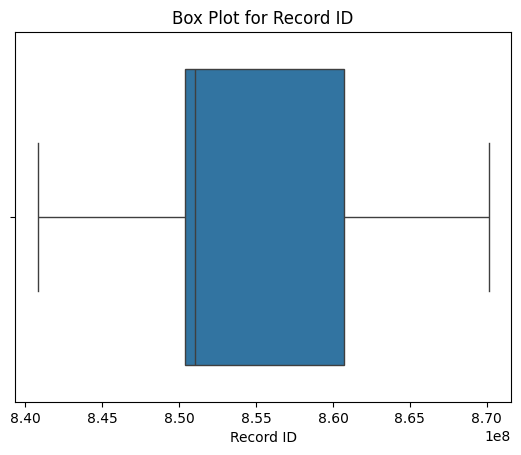

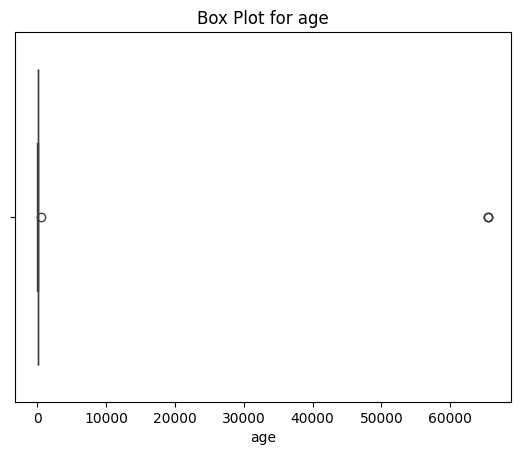


Mean of Numeric Columns:
Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Variance of Numeric Columns:
Record ID    5.748625e+13
age          1.401801e+06
dtype: float64

Standard Deviation of Numeric Columns:
Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = r'/mnt/Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Display basic information about the dataset
    print("Basic Information:")
    print(df.info())
    print("\nFirst few rows of the dataset:")
    print(df.head())

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns:")
    print(categorical_cols)

    # Check unique values in each categorical column
    print("\nUnique values in categorical columns:")
    for col in categorical_cols:
        print(f"{col}: {df[col].unique()}")

    # Determine encoding scheme
    # For demonstration purposes, assuming ordinal variables are identified manually
    # Example: Assuming 'Education Level' is ordinal and others are nominal
    ordinal_cols = ['Education Level']  # Example list
    nominal_cols = list(set(categorical_cols) - set(ordinal_cols))
    print("\nOrdinal Columns:")
    print(ordinal_cols)
    print("\nNominal Columns:")
    print(nominal_cols)

    # Data range for numeric variables
    print("\nNumeric Data Range:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Identify outliers using IQR method
    numeric_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
    print("\nOutliers count:")
    print(outliers.sum())

    # Box plots for numeric columns to visualize outliers
    print("\nBox Plots for Numeric Columns:")
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

    # Calculate mean and variance (or standard deviation)
    print("\nMean of Numeric Columns:")
    print(df[numeric_cols].mean())

    print("\nVariance of Numeric Columns:")
    print(df[numeric_cols].var())

    print("\nStandard Deviation of Numeric Columns:")
    print(df[numeric_cols].std())

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

In [5]:
import pandas as pd

# Define the path to the file
file_path = r'/mnt/Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Fill missing values for numeric columns
    for col in numeric_cols:
        # Check for outliers using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any()

        if is_outlier:
            # Fill missing values with median if outliers are present
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Fill missing values with mean if no outliers are present
            df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing values in categorical columns with mode
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    print("Data imputation completed.")

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Data imputation completed.


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the path to the file
file_path = r'/mnt/Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Determine which columns need scaling
    # We will use the IQR method to identify outliers
    scaling_cols = []  # Columns that need Min-Max Scaling
    standardizing_cols = []  # Columns that need Standard Scaling

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Check for outliers
        if ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any():
            standardizing_cols.append(col)  # Columns with outliers
        else:
            scaling_cols.append(col)  # Columns without outliers

    # Apply Min-Max Scaling
    if scaling_cols:
        scaler_minmax = MinMaxScaler()
        df[scaling_cols] = scaler_minmax.fit_transform(df[scaling_cols])

    # Apply Standard Scaling
    if standardizing_cols:
        scaler_std = StandardScaler()
        df[standardizing_cols] = scaler_std.fit_transform(df[standardizing_cols])

    print("Data normalization and scaling completed.")
    print("\nScaled Data:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Data normalization and scaling completed.

Scaled Data:
      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00 -0.037634   F            f                  f   
1  3.410871e-08 -0.037634   F            f                  f   
2  9.891527e-07 -0.027499   F            f                  f   
3  6.934301e-05 -0.031722   F            f                  f   
4  6.937712e-05 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured

In [7]:
import pandas as pd
import numpy as np

# Define the path to the file
file_path = r'/mnt/Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Identify binary attributes (0/1 values)
    binary_cols = df.columns[df.nunique() == 2]  # Simplistic approach for identifying binary columns

    if len(binary_cols) < 1:
        raise ValueError("No binary columns found in the dataset.")

    # Extract the first two rows
    vector1 = df.loc[0, binary_cols]
    vector2 = df.loc[1, binary_cols]

    # Calculate f11, f10, f01, and f00
    f11 = np.sum((vector1 == 1) & (vector2 == 1))  # Both 1
    f10 = np.sum((vector1 == 1) & (vector2 == 0))  # 1 in vector1 only
    f01 = np.sum((vector1 == 0) & (vector2 == 1))  # 1 in vector2 only
    f00 = np.sum((vector1 == 0) & (vector2 == 0))  # Both 0

    # Calculate Jaccard Coefficient (JC)
    denominator_jc = f01 + f10 + f11
    jc = f11 / denominator_jc if denominator_jc != 0 else float('nan')

    # Calculate Simple Matching Coefficient (SMC)
    denominator_smc = f00 + f01 + f10 + f11
    smc = (f11 + f00) / denominator_smc if denominator_smc != 0 else float('nan')

    print("\nJaccard Coefficient (JC):", jc)
    print("Simple Matching Coefficient (SMC):", smc)

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except ValueError as ve:
    print(f"Value Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")


Jaccard Coefficient (JC): nan
Simple Matching Coefficient (SMC): nan


In [9]:
import pandas as pd
import numpy as np

# Define the path to the file
file_path = r'/mnt/Lab Session Data.xlsx'

try:

    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


    df = df.apply(pd.to_numeric, errors='coerce')

    # Check for missing values
    if df.isnull().values.any():
        print("Missing values detected. Filling missing values with 0.")
        df = df.fillna(0)


    vector1 = df.loc[0].values
    vector2 = df.loc[1].values


    dot_product = np.dot(vector1, vector2)


    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    # Calculate the Cosine Similarity
    if norm_vector1 > 0 and norm_vector2 > 0:
        cosine_similarity = dot_product / (norm_vector1 * norm_vector2)
    else:
        cosine_similarity = float('nan')

    print("\nCosine Similarity:", cosine_similarity)

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except ValueError as ve:
    print(f"Value Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")

Missing values detected. Filling missing values with 0.

Cosine Similarity: 0.9999999999999885
